# (Ford GoBike System Data)
## by (Ibrahem Aljenaidel)
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#ws">Data Wrangling</a></li>
<li><a href="#ui">Univariate Exploration</a></li>
<li><a href="#bi">Bivariate Exploration</a></li>
<li><a href="#wi">Multivariate Exploration</a></li>

</ul>


<a id='intro'></a>

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

In [424]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import datetime

%matplotlib inline

In [425]:
df = pd.read_csv('data.csv')

In [426]:
df.member_gender.unique()

array(['Male', 'Female', nan, 'Other'], dtype=object)

In [427]:
# overview of the strcture
print(df.shape)
print(df.dtypes)

(519700, 15)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id             int64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id               int64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
dtype: object


In [428]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987.0,Male
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1965.0,Female
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,NaN,NaN
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,NaN,NaN
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,1997.0,Female


In [429]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,453159.000000
mean,1099.009521,95.034245,37.771653,-122.363927,92.184041,37.771844,-122.363236,1672.533079,1980.404787
std,3444.146451,86.083078,0.086305,0.105573,84.969491,0.086224,0.105122,971.356959,10.513488
min,61.000000,3.000000,37.317298,-122.444293,3.000000,37.317298,-122.444293,10.000000,1886.000000
25%,382.000000,24.000000,37.773492,-122.411726,23.000000,37.774520,-122.410345,787.000000,1974.000000
50%,596.000000,67.000000,37.783521,-122.398870,66.000000,37.783830,-122.398525,1728.500000,1983.000000
75%,938.000000,139.000000,37.795392,-122.391034,134.000000,37.795392,-122.391034,2520.000000,1988.000000
max,86369.000000,340.000000,37.880222,-121.874119,340.000000,37.880222,-121.874119,3733.000000,1999.000000


In [432]:

print(df[df.member_birth_year < 1930].member_birth_year)
print(df[df.member_birth_year < 1930].shape)
df[df.member_birth_year < 1930].member_birth_year

287       1900.0
1751      1900.0
3119      1900.0
3259      1900.0
5246      1900.0
7183      1902.0
8077      1902.0
9838      1900.0
10712     1900.0
13035     1900.0
14777     1924.0
14779     1900.0
15146     1902.0
15333     1928.0
15948     1900.0
16001     1900.0
16466     1902.0
16977     1902.0
16980     1924.0
18074     1900.0
18367     1902.0
19981     1902.0
20347     1902.0
20411     1924.0
21583     1924.0
21678     1900.0
21905     1900.0
22517     1928.0
22825     1928.0
24051     1924.0
           ...  
497562    1902.0
498254    1902.0
498484    1902.0
498964    1902.0
499339    1902.0
499968    1902.0
500030    1902.0
503584    1902.0
504683    1902.0
505380    1902.0
505624    1902.0
506359    1902.0
506406    1902.0
506994    1902.0
507024    1902.0
507440    1928.0
508197    1928.0
509300    1902.0
509330    1902.0
509928    1902.0
510055    1902.0
511659    1902.0
512160    1902.0
514200    1902.0
514556    1902.0
517299    1902.0
517916    1902.0
518374    1902

287       1900.0
1751      1900.0
3119      1900.0
3259      1900.0
5246      1900.0
7183      1902.0
8077      1902.0
9838      1900.0
10712     1900.0
13035     1900.0
14777     1924.0
14779     1900.0
15146     1902.0
15333     1928.0
15948     1900.0
16001     1900.0
16466     1902.0
16977     1902.0
16980     1924.0
18074     1900.0
18367     1902.0
19981     1902.0
20347     1902.0
20411     1924.0
21583     1924.0
21678     1900.0
21905     1900.0
22517     1928.0
22825     1928.0
24051     1924.0
           ...  
497562    1902.0
498254    1902.0
498484    1902.0
498964    1902.0
499339    1902.0
499968    1902.0
500030    1902.0
503584    1902.0
504683    1902.0
505380    1902.0
505624    1902.0
506359    1902.0
506406    1902.0
506994    1902.0
507024    1902.0
507440    1928.0
508197    1928.0
509300    1902.0
509330    1902.0
509928    1902.0
510055    1902.0
511659    1902.0
512160    1902.0
514200    1902.0
514556    1902.0
517299    1902.0
517916    1902.0
518374    1902

### What is the structure of your dataset?

> There is over 500k observation in this dataset and 15 columns that repersent the bike users.
variables about the name of both start_station and end_station and thier lat and long coordinates.
The users are divided into two groups 1.Member (Subscriber) and 2.Customer, also thier year of birth (age).
An impoertant variables is the duration of the trip in seconds.

### What is/are the main feature(s) of interest in your dataset?

> The duration in comparing with diffrent genders and the diffrent user group. a question such as Do member have higher durection trip than regualr customer? The result of this could encurage a customer to be a member.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I beleive the duration, month, day and hour of the trip will be helpful in comparing diffrent groups such as gender and user type..

<a id='ws'></a>

## Wrangling step - assessing and cleaning.
- assess visually and programmatically.

### 1.ASSESSMNET:
###### dtypes:
- start_time as datetime or int 
- end_time as datetime or int 
- start_station_id as String object
- end_station_id as String object
- bike_id as string 
- user_type as categorical
- member_birth_year as datetime or maybe int.


###### null values:
- member_birth_year
- member_gender

In [433]:
print(df.dtypes)

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id             int64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id               int64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
dtype: object


In [434]:
# checking for null values
len(df) - df.count()

duration_sec                   0
start_time                     0
end_time                       0
start_station_id               0
start_station_name             0
start_station_latitude         0
start_station_longitude        0
end_station_id                 0
end_station_name               0
end_station_latitude           0
end_station_longitude          0
bike_id                        0
user_type                      0
member_birth_year          66541
member_gender              66462
dtype: int64

In [435]:
df.member_gender.unique()

array(['Male', 'Female', nan, 'Other'], dtype=object)

In [436]:
# checking for duplicated values
len(df) - len(df.duplicated())

0

In [437]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,453159.000000
mean,1099.009521,95.034245,37.771653,-122.363927,92.184041,37.771844,-122.363236,1672.533079,1980.404787
std,3444.146451,86.083078,0.086305,0.105573,84.969491,0.086224,0.105122,971.356959,10.513488
min,61.000000,3.000000,37.317298,-122.444293,3.000000,37.317298,-122.444293,10.000000,1886.000000
25%,382.000000,24.000000,37.773492,-122.411726,23.000000,37.774520,-122.410345,787.000000,1974.000000
50%,596.000000,67.000000,37.783521,-122.398870,66.000000,37.783830,-122.398525,1728.500000,1983.000000
75%,938.000000,139.000000,37.795392,-122.391034,134.000000,37.795392,-122.391034,2520.000000,1988.000000
max,86369.000000,340.000000,37.880222,-121.874119,340.000000,37.880222,-121.874119,3733.000000,1999.000000


In [438]:
# Min member_birth_year is 1886 !!? (should be 1986 probably) 
print(df[df.member_birth_year == 1886].member_birth_year)

425817    1886.0
426608    1886.0
Name: member_birth_year, dtype: float64


### 2.Cleaning

In [439]:
# lets fix this now.
df.iloc[425817,df.columns.get_loc('member_birth_year')] = 1986
df.iloc[426608, df.columns.get_loc('member_birth_year')] = 1986

In [440]:
users = df.user_type.unique()
users == ['Customer', 'Subscriber']

array([ True,  True])

In [441]:
# checking 
print(df.dtypes)

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id             int64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id               int64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
dtype: object


In [442]:
# dealing with null values.
# so when ever the value of the gender is missing the birth year will always be null.
df[(df.member_gender.isnull()) & (df.member_birth_year.isnull())].shape

(66462, 15)

In [443]:
# drop null values
df.dropna(inplace=True)
df[df.member_gender.isnull()]
df.member_gender.unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [444]:
# fixing the dtypes problems.
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)
df.start_station_id = df.start_station_id.astype(str)
df.end_station_id = df.end_station_id.astype(str)
df.bike_id = df.bike_id.astype(str)
df.user_type = df.user_type.astype('category')
df.member_birth_year = df.member_birth_year.astype(int) # easeir to deal with as an integer.

In [445]:
df.head(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987,Male
1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.617,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1965,Female
4,43603,2017-12-31 14:23:14.001,2018-01-01 02:29:57.571,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,1997,Female


In [446]:
df.shape

(453159, 15)

### Feature Engineering 
> Since the start_time  & end_time column has the year, month, day, and hour we can extract useful information and create new columns to use it in our expolring.
 - Year 
 - Month
 - Day
 - Hour
 - Age: extracted from member_birth_year

In [447]:
# https://www.journaldev.com/23365/python-string-to-datetime-strptime 
# https://www.geeksforgeeks.org/python-pandas-series-dt-strftime/

df['trip_month'] = df.start_time.dt.strftime('%b')
df['trip_day'] = df.start_time.dt.strftime('%a')
df['trip_hour'] = df.start_time.dt.strftime('%H')
#df['start_seconds'] = df.start_time.dt.strftime('%S')
#df['start_microsecond'] = df.start_time.dt.strftime('%f')  

In [448]:
df['age'] = datetime.now().year - df.member_birth_year

In [449]:
# unneeded columns
df.drop(axis=1, columns=['start_time','end_time'], inplace=True)

#### Final strcture of the dataframe.

In [450]:
df_clean = df.copy()
df_clean.head()

,duration_sec,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,trip_month,trip_day,trip_hour,age
0,80110,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987,Male,Dec,Sun,16,32
1,78800,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1965,Female,Dec,Sun,15,54
4,43603,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,1997,Female,Dec,Sun,14,22
6,4507,259,Addison St at Fourth St,37.866249,-122.299371,259,Addison St at Fourth St,37.866249,-122.299371,3539,Customer,1991,Female,Dec,Sun,23,28
12,2183,67,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,24,Spear St at Folsom St,37.789677,-122.390428,2311,Subscriber,1990,Male,Dec,Sun,23,29


<a id='ui'></a>
## Univariate Exploration

> In this section, I will investigate the distributions of some  variables individually.

- Due to the very large range of values taken, I performed scale log transformation ocn the x-axis.
- Dustrubitui is skewed to the ? 
- most values are between 250 and 3000.
- the most right values I would not consider them as outliers yet.

In [451]:
np.log10(df_clean.duration_sec.describe())

count    5.656251
mean     2.920611
std      3.402310
min      1.785330
25%      2.561101
50%      2.745075
75%      2.923244
max      4.935769
Name: duration_sec, dtype: float64

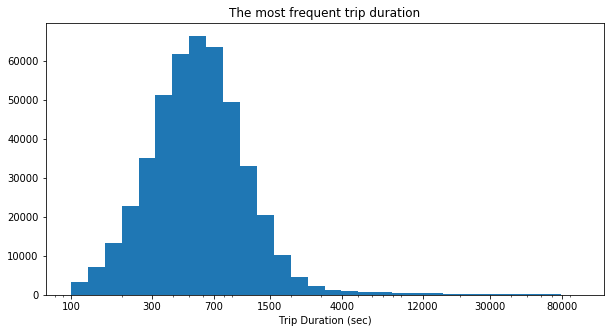

In [484]:
# 1. duration.
bins = 10 ** np.arange(2, 5.0 + 0.1, 0.1) 
plt.figure(figsize=[10, 5])
plt.hist(data=df_clean, x='duration_sec', bins=bins)
ticks = [100, 300, 700 , 1500, 4000, 12000, 30000, 80000]
labels = ['{}'.format(val) for val in ticks]
plt.xscale('log')
plt.xticks(ticks, labels)
plt.xlabel('Trip Duration (sec)')
plt.title('The most frequent trip duration')
plt.show();

In [453]:
df_clean.head(1)

,duration_sec,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,trip_month,trip_day,trip_hour,age
0,80110,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987,Male,Dec,Sun,16,32


### visualizing months distribution:
as the weather gets colder the less trips were made.


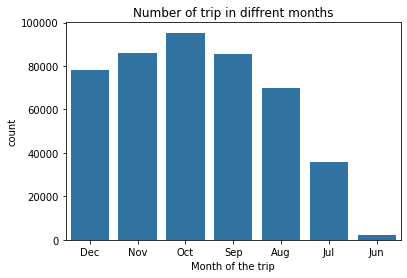

In [487]:
sb.countplot(data=df_clean, x='trip_month', color=sb.color_palette()[0]);
plt.xlabel('Month of the trip')
plt.title('Number of trip in diffrent months');

### Exploring the days variable.
weekdays has way more trips than the weekends, as expected.

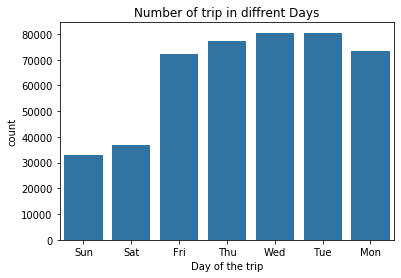

In [488]:
sb.countplot(data=df_clean, x='trip_day', color=sb.color_palette()[0]);
plt.xlabel('Day of the trip')
plt.title('Number of trip in diffrent Days');

### Age distribution

- Age seems to be unrealstic, there are more than 300 records with age greater than 100 years old. Most of whcih are subscriber so deleting these rows could affect other aspect in comapring the user_types and trip duration in Bivariate and Multivariate steps. 
- Beside that the distruption seems normal most points were between 35 to 45 years.

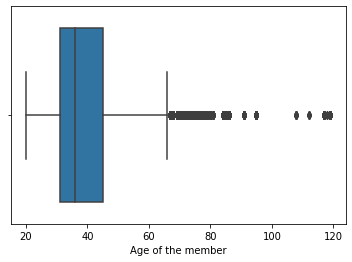

In [490]:
# I would consider the Outliers from maybe 95 yers and above.
sb.boxplot(data=df_clean, x='age', color=sb.color_palette()[0]);
plt.xlabel('Age of the member');

In [457]:
df_clean.age.describe()

count    453159.000000
mean         38.594771
std          10.511623
min          20.000000
25%          31.000000
50%          36.000000
75%          45.000000
max         119.000000
Name: age, dtype: float64

In [458]:
np.log10(df_clean.age.describe())

count    5.656251
mean     1.586528
std      1.021670
min      1.301030
25%      1.491362
50%      1.556303
75%      1.653213
max      2.075547
Name: age, dtype: float64

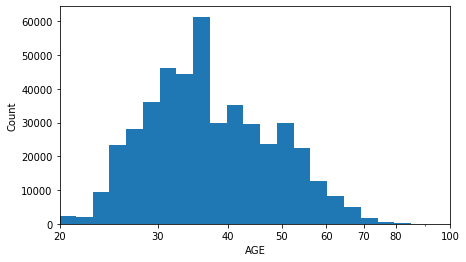

In [459]:
bins = 10 ** np.arange(1, 3.0 + 0.03 ,0.03) 
plt.figure(figsize=[7, 4])
plt.hist(data=df_clean, x='age', bins=bins)
ticks = [20, 30, 40 , 50, 60, 70, 80, 100]
labels = ['{}'.format(val) for val in ticks]
plt.xscale('log')
plt.xticks(ticks, labels)
plt.xlabel('AGE')
plt.ylabel('Count')
plt.xlim(20,100)
plt.show();

In [460]:
# takeing a deeper look.
np.sort(df_clean.age.unique())

array([ 20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,  32,
        33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,
        46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,
        59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,
        72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  84,  85,  86,
        91,  95, 108, 112, 117, 118, 119], dtype=int64)

In [461]:
# lets fix what we can, 1886 seem to be a typo of 1986.
df_clean[df_clean.age > 100].member_birth_year.unique()

array([1900, 1902, 1911, 1907, 1901], dtype=int64)

In [462]:
df_clean[df_clean.age > 100].head()

,duration_sec,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,trip_month,trip_day,trip_hour,age
287,581,274,Oregon St at Adeline St,37.857567,-122.267558,173,Shattuck Ave at 55th Ave,37.840364,-122.264488,3050,Subscriber,1900,Male,Dec,Sun,18,119
1751,370,207,Broadway at Coronado Ave,37.835788,-122.251621,173,Shattuck Ave at 55th Ave,37.840364,-122.264488,456,Subscriber,1900,Male,Dec,Sat,17,119
3119,457,207,Broadway at Coronado Ave,37.835788,-122.251621,173,Shattuck Ave at 55th Ave,37.840364,-122.264488,1238,Subscriber,1900,Male,Dec,Fri,18,119
3259,613,173,Shattuck Ave at 55th Ave,37.840364,-122.264488,207,Broadway at Coronado Ave,37.835788,-122.251621,1238,Subscriber,1900,Male,Dec,Fri,17,119
5246,271,158,Shattuck Ave at Telegraph Ave,37.833279,-122.263490,173,Shattuck Ave at 55th Ave,37.840364,-122.264488,173,Subscriber,1900,Male,Dec,Thu,16,119


In [463]:
# most of them are subscriber.
df_clean[df_clean.age > 100].user_type.value_counts()

Subscriber    351
Customer       31
Name: user_type, dtype: int64

In [464]:
# taking look at each individual outlier
df_clean[df_clean.age > 100].member_birth_year.value_counts()

1902    217
1900    142
1911     12
1907      7
1901      4
Name: member_birth_year, dtype: int64

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The duration_trip was skweed and had many ponts; a scale transformation was requred. Most points were under 25 min.
>
> The Months of each trip was not really surprising, most trip took place during summer and warmer weather in general and far less during colder seasons.
>
> The days of the week had more trip than weekends, weekdays had a close distribution, but it's clear that after the weakend the number of trip increased slowly to it's peek on Tuesday.
> 
> Age had some problems with outliers, but moving a way from this, the boxplot and histogram seem to be fair enough. Most points were between 35 to 45 years. Log scale was needed to produce the correct result due to the large number of points.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Almost all of the variables were engineered. Why? because the data was not tidy and a lot of columns were lost such as month, weekdays, weekend, hours, and age. Due to poor data structure.

<a id='bi'></a>
## Bivariate Exploration

> I will further expolore the variables observer from the Univariate step and more.

Some intersting relationship.


- Trip duration and Age
- Time of trip (hour) and Days.
- Member Gender and Trip duration
- User Type and Member Gender
- Member Gender and Months or Days.
- 
- Month and Day


In [465]:
df_clean.head(3)

,duration_sec,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,trip_month,trip_day,trip_hour,age
0,80110,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987,Male,Dec,Sun,16,32
1,78800,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1965,Female,Dec,Sun,15,54
4,43603,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,1997,Female,Dec,Sun,14,22


######  AGE and Trip Duration
In comparing the Age with Trip Duration from the below figures, we have an inverse relationship between the two variable.
duration trip decreases in general as age increses as excpected.

In [466]:
numeric_vars = ['duration_sec', 'age']

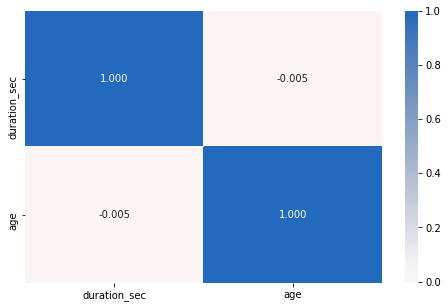

In [467]:
# correlation plot -  a negative correlation 
# *code taking from the previos lesson 'case-study of dimond.
plt.figure(figsize = [8, 5])
sb.heatmap(df_clean[numeric_vars].corr(), annot = True, fmt = '.3f',cmap = 'vlag_r', center = 0)
plt.show()

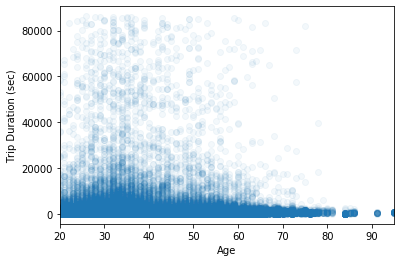

In [468]:
# a scatter plot.
plt.scatter(data=df_clean, x='age', y='duration_sec', alpha=1/20)
plt.xlim(20, 95) ## for better and focused result.
plt.xlabel('Age')
plt.ylabel('Trip Duration (sec)');

##### Looking at the Member gender.
- Male seem to the higher trip duration, but this need to be investigated more. (propration)

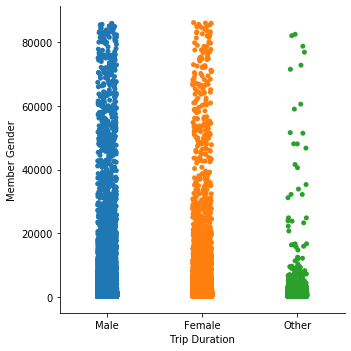

In [469]:
sb.catplot(x="member_gender", y="duration_sec", data=df_clean)
plt.xlabel('Trip Duration')
plt.ylabel('Member Gender');

Text(0, 0.5, 'Number of Trips')

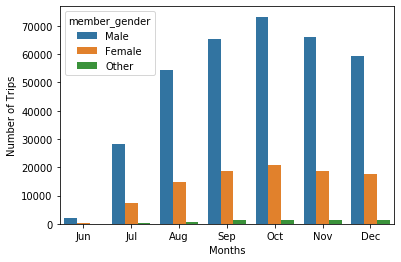

In [470]:
month_order = list(reversed(df_clean.trip_month.unique()))
  
sb.countplot(data=df_clean, x='trip_month', hue='member_gender', order= month_order)
plt.xlabel('Months')
plt.ylabel('Number of Trips')

C:\Users\Lenovo\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


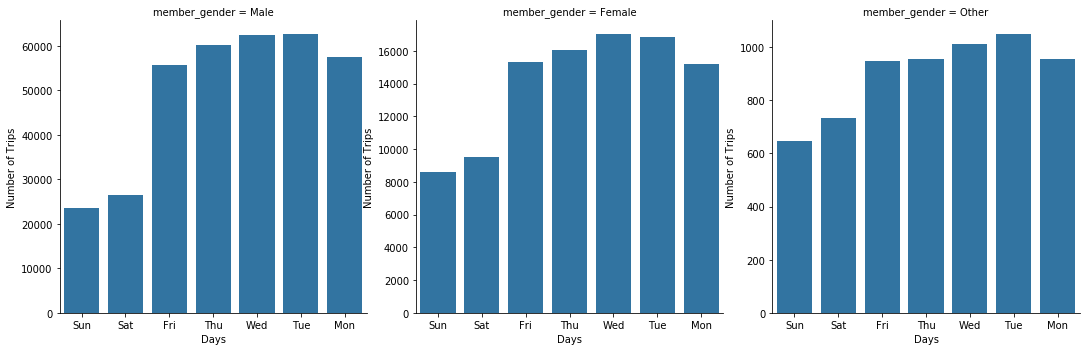

In [471]:
#sb.catplot(col='member_gender', x='trip_month',kind='count', data=df_clean, color=sb.color_palette()[0]);
month_order = list(reversed(df_clean.trip_month.unique()))
g = sb.FacetGrid(data=df_clean,col='member_gender', col_wrap = 3, height = 5, sharey=False)
g.map(sb.countplot, 'trip_day')

for i in range(3):
    g.axes[i].set_xlabel('Days')
    g.axes[i].set_ylabel('Number of Trips')

plt.show();

#### User Type with member gender

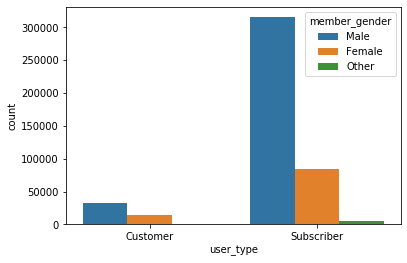

In [472]:
sb.countplot(data=df_clean, x='user_type', hue='member_gender')

##### Time of the trip in diffrent days between Subscribers and Customers.
- 10 to 17  is the obvious difference in both groups.
- Subscriber seem to unimodal
- Both model are left skewwed as excpected (midnight to dawn)

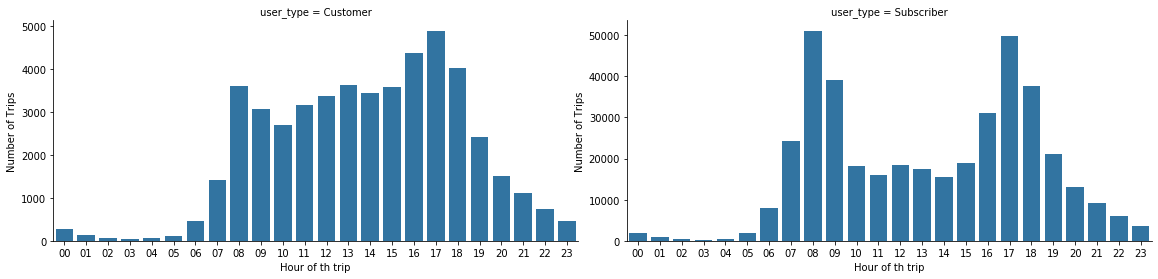

In [473]:
g = sb.FacetGrid(data=df_clean,col='user_type', col_wrap = 2, height = 4, aspect=2, sharey=False)
g.map(sb.countplot, 'trip_hour')
for i in range(2):
    g.axes[i].set_xlabel('Hour of th trip')
    g.axes[i].set_ylabel('Number of Trips')

#### Other variables:
Station and user type

In [474]:
# stations
df_clean.head()

,duration_sec,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,trip_month,trip_day,trip_hour,age
0,80110,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987,Male,Dec,Sun,16,32
1,78800,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1965,Female,Dec,Sun,15,54
4,43603,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,1997,Female,Dec,Sun,14,22
6,4507,259,Addison St at Fourth St,37.866249,-122.299371,259,Addison St at Fourth St,37.866249,-122.299371,3539,Customer,1991,Female,Dec,Sun,23,28
12,2183,67,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,24,Spear St at Folsom St,37.789677,-122.390428,2311,Subscriber,1990,Male,Dec,Sun,23,29


In [475]:
df_sub = df_clean.query('user_type == "Subscriber"').start_station_name.value_counts()
df_cus = df_clean.query('user_type == "Customer"').start_station_name.value_counts()

freq_station = df_clean.start_station_name.value_counts()
y = freq_station.values[0:20] 
x = freq_station.index[0:20] 

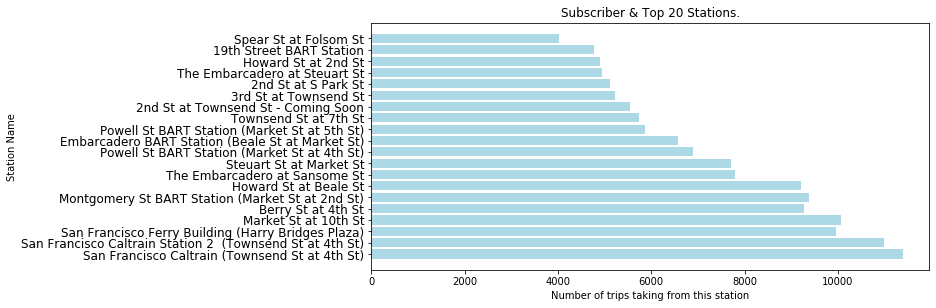

In [476]:
x_sub = df_sub.index[0:20] 
y_sub = df_sub.values[0:20] 

x_cus = df_cus.index[0:20] 
y_cus = df_cus.values[0:20] 

plt.figure(figsize = [10, 10]) # larger figure size for subplots

plt.subplot(2,1,1)
plt.barh(x,df_sub[x],color='lightblue')
plt.yticks(fontsize=12)
plt.title('Subscriber & Top 20 Stations.')
plt.xlabel('Number of trips taking from this station')
plt.ylabel('Station Name');

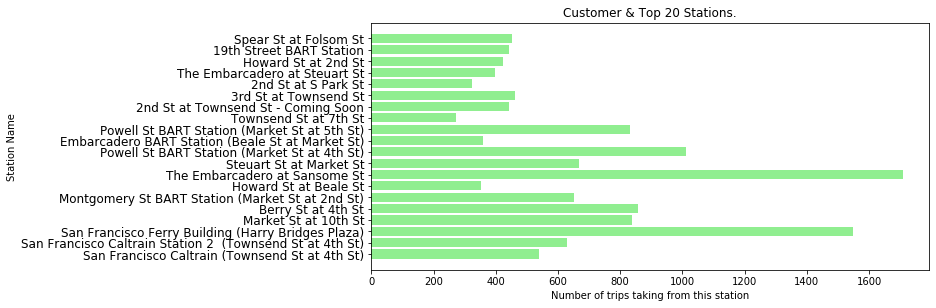

In [477]:
plt.figure(figsize = [10, 10]) # larger figure size for subplots
plt.subplot(2, 1, 2)
plt.barh(x,df_cus[x],color='lightgreen')
plt.yticks(fontsize=12)
plt.title('Customer & Top 20 Stations.')
plt.xlabel('Number of trips taking from this station')
plt.ylabel('Station Name');

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Age and Trip duration: In comparing the Age with Trip Duration from the below figures, we have an inverse relationship between the two variable. duration trip decreases in general as age increses as excpected.
>
> Member Gender with Trip duartion, days, and months: Male gender is most frequent. Male seem to be slightly higher trip duartion than female. The disturbution of trips in difrent months is the same an all genders, lower trps in colder months. comparing the days of the trip, lower trip in weekends and higher in weekdays in all genders.
>
> Time of the trip (hour) with user type: Subscriber seem to be Unimodal it has a lower trips from 10 to 17 o'clock. The Customer in these hours have more trips. Both type are left skewed. 
### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> In comparing the customer type and the most frequent start station of all trips. There was no direct relation between the most frequent station and the customer.

<a id='wi'></a>
## Multivariate Exploration

> In this section I will try imporving the result of the previos figures by adding more variables to the equation.

##### Member gender and user trips in diffrent months.

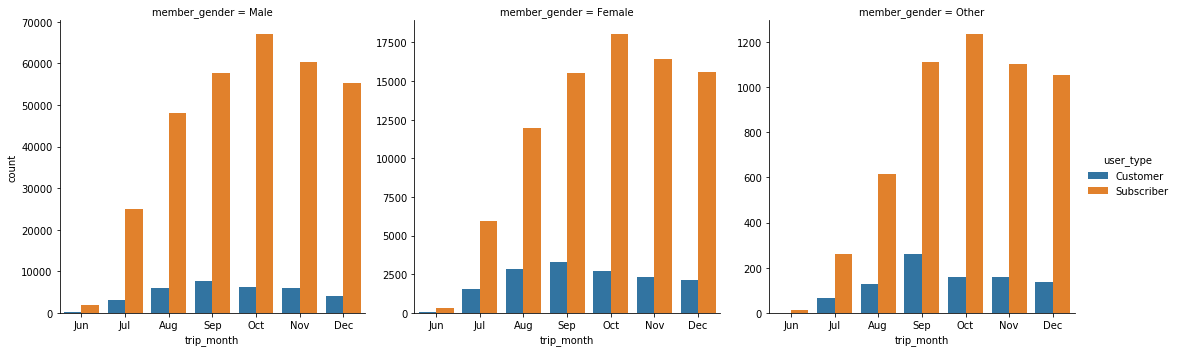

In [492]:
sb.catplot(data=df_clean, x='trip_month', col='member_gender',hue='user_type',kind='count', order= month_order, sharey=False)

#### Trip duartion across user type in different months.

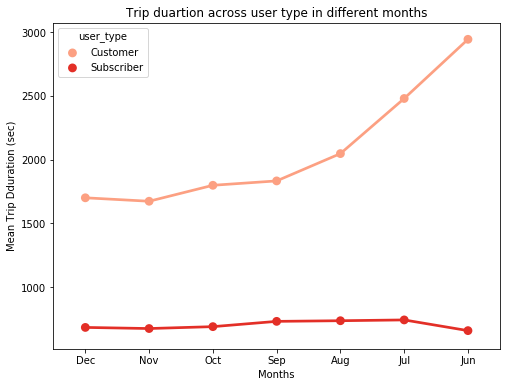

In [479]:
fig = plt.figure(figsize = [8,6])
sb.pointplot(data = df_clean, x = 'trip_month', y = 'duration_sec', hue = 'user_type', palette = 'Reds', ci=None)
plt.title('Trip duartion across user type in different months')
plt.ylabel('Mean Trip Dduration (sec)')
plt.xlabel('Months')
plt.show();

##### Trib duration of each day for member gender.
Females in general tend to have much longer trips.

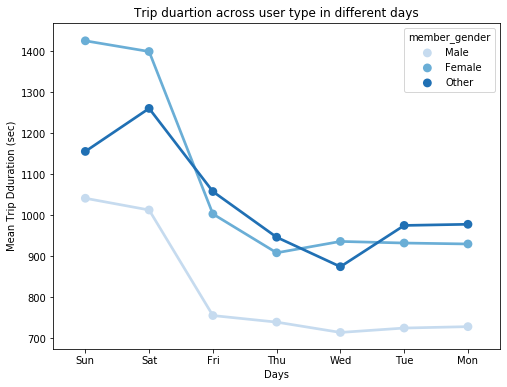

In [480]:
fig = plt.figure(figsize = [8,6])
sb.pointplot(data = df_clean, x = 'trip_day', y = 'duration_sec', hue = 'member_gender', palette = 'Blues', ci=None)
plt.title('Trip duartion across user type in different days')
plt.ylabel('Mean Trip Dduration (sec)')
plt.xlabel('Days')
plt.show();

#### Days and hours with user type
 This is a good oppertinity to create heatmap.

In [481]:
df_sub = df_clean.query('user_type == "Subscriber"').groupby(['trip_day','trip_hour'], 
                                                           as_index=False).size().reset_index(name='')
df_cus = df_clean.query('user_type == "Customer"').groupby(['trip_day','trip_hour'], 
                                                           as_index=False).size().reset_index(name='')

Text(0.5, 365.50909090909096, 'Hour of th trip')

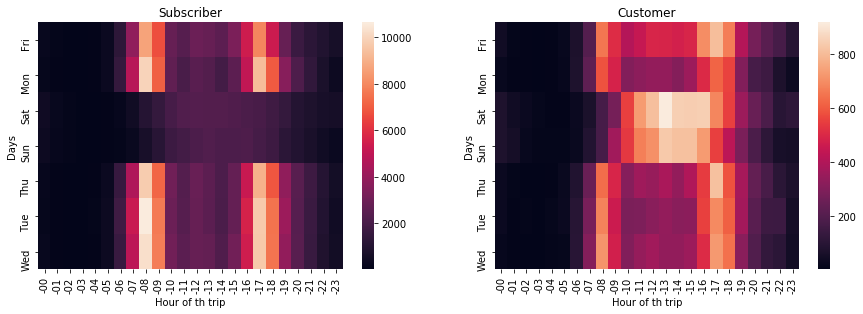

In [482]:
plt.figure(figsize = [15, 10]) # larger figure size for subplots


plt.subplot(2,2,1)
sb.heatmap(df_sub.pivot('trip_day','trip_hour'))
plt.title('Subscriber')
plt.ylabel('Days')
plt.xlabel('Hour of th trip')

plt.subplot(2,2,2) 
sb.heatmap(df_cus.pivot('trip_day','trip_hour'))
plt.title('Customer')
plt.ylabel('Days')
plt.xlabel('Hour of th trip')

#### Trip duartion across user type in different hours in the day.

Text(0.5, 21.706249999999983, 'Hour of the trip')

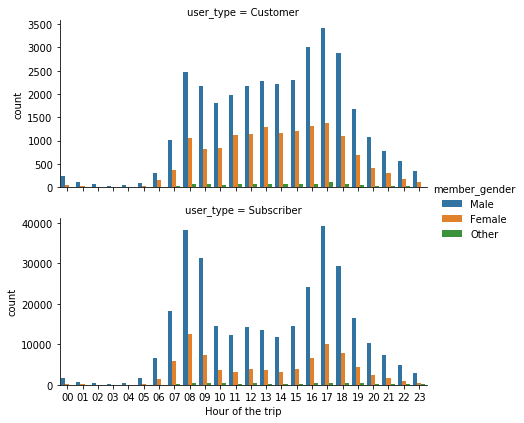

In [493]:
sb.catplot(data=df_clean,x='trip_hour',col='user_type', 
           hue='member_gender', col_wrap = 1, 
           height = 3, aspect=2, 
           sharey=False, kind='count')
plt.xlabel('Hour of the trip')

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> When looking at member gender and user type across month of the trip we dont really see any pattern with diffrent gender and user type. Each gender does not have preferd month.
>
> Trip Duration in diffrent months taking into account the user type, now we can see the Customer has much higher trip duration in average.
>
> Trip duartion of each day for difrfrent memeber gender, by adding the 'member gender' in the equetion we can now observe the average trip duration of each gender in diffrent days.
>
> Bulding a heatmap to observe the frequent hours in each day made by each user type. 

### Were there any interesting or surprising interactions between features?

> It was not clear at first but after bulding a pointplot we can see that female members has much higher trip duration than any other genders. 
> The customer has higher trip duration than subscriber in avarage.
> Looking at the heatmap the subscriber is far less active than the customer whcich was a surprise to me.

In [496]:
df_clean.to_csv('df_clean.csv', index=False)